## Clustering on a map of Europe with DB Scan

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.cluster import DBSCAN

%matplotlib inline

In [2]:
data=pd.read_csv('summer-travel-gps-full.csv')
y=data['city']
x=data.drop(labels=['date','city','country'],axis=1)

In [3]:
x.head()

,lat,lon
0,51.481292,-0.451011
1,51.474005,-0.450999
2,51.478199,-0.446081
3,51.478199,-0.446081
4,51.474146,-0.451562


Creating two Data Frames - one for clustering algorithm and one for verification and adding cities names on the map

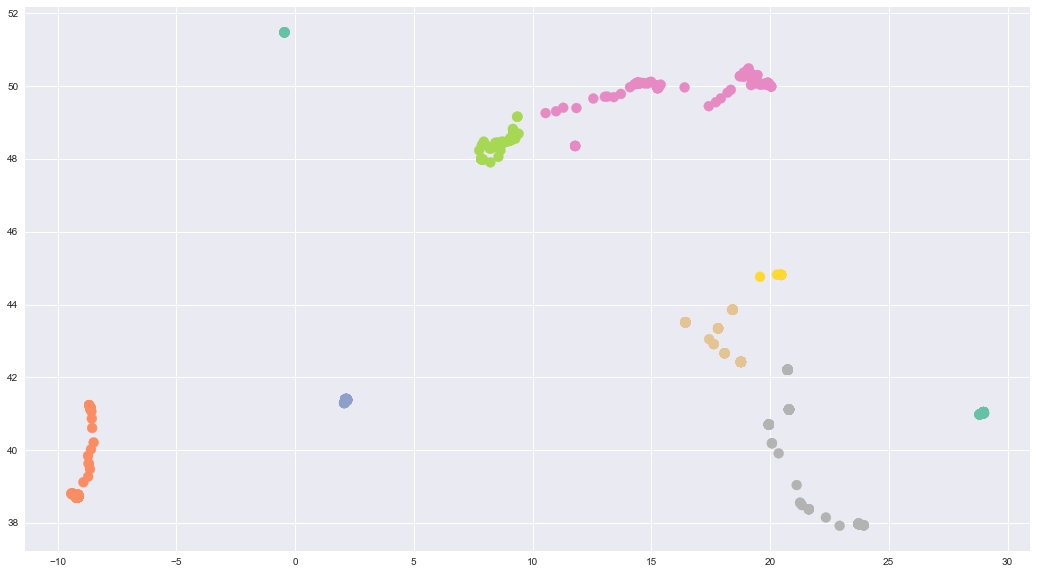

In [48]:
modeldb = DBSCAN(eps=1.2,min_samples=6)
labels=modeldb.fit_predict(x)

plt.figure(figsize=(18,10))
plt.scatter(x['lon'],x['lat'],s=100,c=np.array(sns.color_palette('Set2',20))[labels])

DB Scan found 9 clusters - visual representation above shows that it is quite good. Now cities can be added.

In [26]:
data.replace(to_replace='Kraków-Śródmieście', value='Krakow', inplace=True)
data['label']=labels

I will start with adding cities that were most frequently visited.

In [27]:
cities_check=data['city'].value_counts()

In [29]:
cities_check.head(23)

Barcelona                         632
Lisbon                            158
Tübingen                          131
Prague                             97
Istanbul                           94
Krakow                             84
Athens                             67
Porto                              58
Freiburg                           54
Kotor                              51
Ohrid                              34
Prizren                            30
Berat                              27
Split                              23
Sarajevo                           15
Belgrade                           14
Kutna Hora                         12
Sintra                             12
Mostar                              9
Vila Nova de Gaia Municipality      9
Dytiki Ellada                       9
Dubrovnik                           6
Hounslow                            6
Name: city, dtype: int64

In [31]:
cities_check=cities_check.head(23).index

In [38]:
cities=data.query("city in @cities_check")
cities=cities.drop(labels=['date','country'],axis=1)
cities = cities.sort_values('city').drop_duplicates(subset=['city'])

In [42]:
cities

,lat,lon,city,label
1627,37.967211,23.728490,Athens,7
1318,41.383798,2.179628,Barcelona,2
1364,44.814237,20.463395,Belgrade,5
1557,40.702180,19.946316,Berat,7
1432,42.660845,18.085327,Dubrovnik,6
1578,39.040021,21.120077,Dytiki Ellada,7
979,47.988366,7.880618,Freiburg,4
6,51.479669,-0.441024,Hounslow,0
1710,41.043465,28.985441,Istanbul,8
1464,42.423753,18.771456,Kotor,6


Dropping Sintra as it is too close to Lisbon, Vila Nova as it is too close to Porto and Kutna Hora as it is close to Prague.

In [55]:
cities=cities.drop([198,124,734])

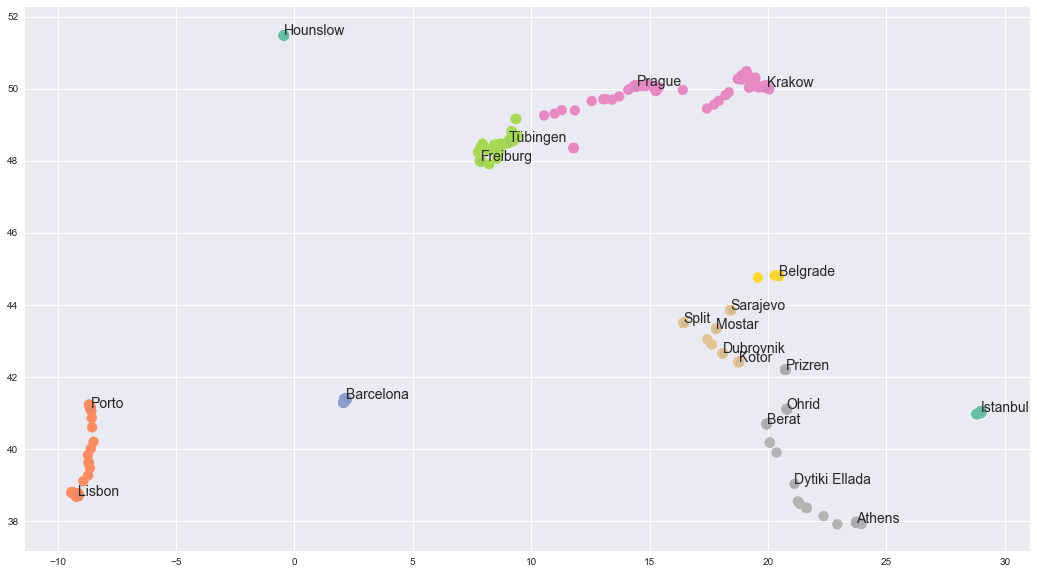

In [56]:
fig, ax = plt.subplots(figsize=(18,10))
ax.scatter(x['lon'],x['lat'],s=100,c=np.array(sns.color_palette('Set2',20))[labels])
ax.scatter(cities['lon'],cities['lat'],alpha=0.1)
lista=cities['city']

for i, txt in enumerate(lista):
    ax.annotate(txt, (cities['lon'].iloc[i],cities['lat'].iloc[i]), size=14)

Another approach would be to select one city per label created by DB Scan

In [58]:
cities2=data.drop(labels=['date','country'],axis=1)
cities2=cities2.sort_values('label').drop_duplicates(subset=['label'])

In [59]:
cities2

,lat,lon,city,label
0,51.481292,-0.451011,West Drayton,0
180,39.118383,-8.913738,Azambuja,1
1233,41.386272,2.167659,Barcelona,2
1756,48.356285,11.791710,Munich,3
913,48.519180,9.058761,Tübingen,4
1373,44.814251,20.463413,Belgrade,5
1449,42.423726,18.771465,Kotor,6
1598,37.976596,23.725825,Athens,7
1722,41.015595,28.967419,Istanbul,8


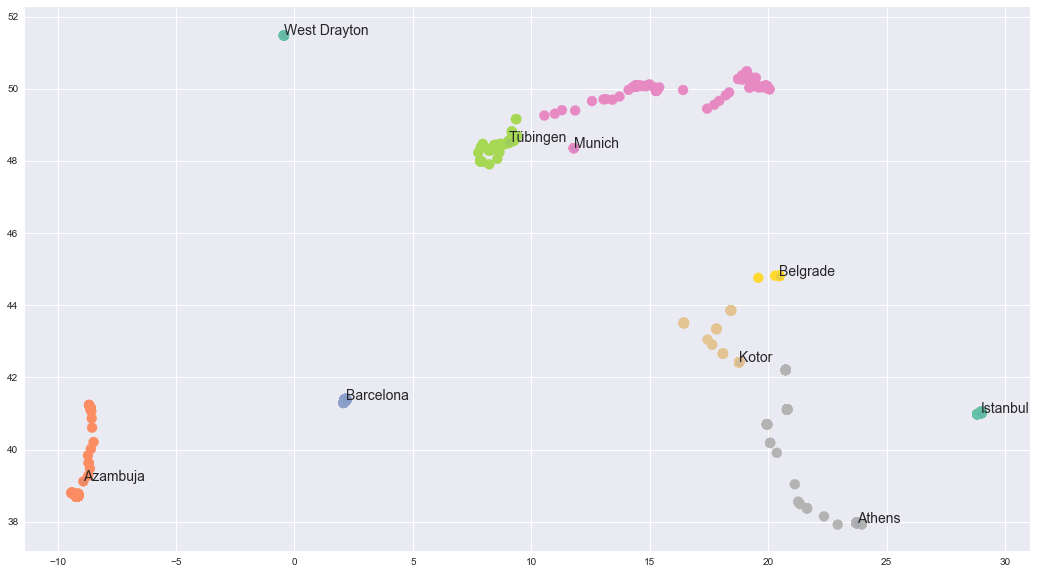

In [61]:
fig, ax = plt.subplots(figsize=(18,10))
ax.scatter(x['lon'],x['lat'],s=100,c=np.array(sns.color_palette('Set2',20))[labels])
ax.scatter(cities2['lon'],cities2['lat'],alpha=0.1)
lista=cities2['city']

for i, txt in enumerate(lista):
    ax.annotate(txt, (cities2['lon'].iloc[i],cities2['lat'].iloc[i]), size=14)